## Handling time zones

TSP provides simple support for time zones.

When TSP objects are created, if the `times` input is not timezone-aware, or if the `synthetic` data is created, the resulting timestamps will not have any timezone information.

In [59]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tsp import TSP

t_naive = TSP.synthetic(depths=[0.5, 1, 3])
t_naive.times[0:5]


DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', name='time', freq=None)


Time zones can be specified as UTC offsets. Once set, the UTC offset will be visible whenever the timestamps are displayed.

In [60]:
from copy import copy
t_specified = copy(t_naive)
t_specified.set_utc_offset("-07:00")
print(t_specified.times[0:5])
print(t_specified.long)

DatetimeIndex(['2000-01-01 00:00:00-07:00', '2000-01-02 00:00:00-07:00',
               '2000-01-03 00:00:00-07:00', '2000-01-04 00:00:00-07:00',
               '2000-01-05 00:00:00-07:00'],
              dtype='datetime64[ns, UTC-07:00]', name='time', freq=None)
                          time depth  temperature_in_ground  count
0    2000-01-01 00:00:00-07:00   0.5               4.786277      1
1    2000-01-02 00:00:00-07:00   0.5               4.796961      1
2    2000-01-03 00:00:00-07:00   0.5               4.806088      1
3    2000-01-04 00:00:00-07:00   0.5               4.813655      1
4    2000-01-05 00:00:00-07:00   0.5               4.819659      1
...                        ...   ...                    ...    ...
3286 2002-12-28 00:00:00-07:00   3.0               1.681319      1
3287 2002-12-29 00:00:00-07:00   3.0               1.716074      1
3288 2002-12-30 00:00:00-07:00   3.0               1.750243      1
3289 2002-12-31 00:00:00-07:00   3.0               1.783817      1

If timezone-aware dates are passed to the `TSP` constructor, the timezone information will be preserved.

In [68]:
import datetime
import pandas as pd
import numpy as np
times = pd.to_datetime(["2014-01-04T00:00:00Z",
                        "2014-01-04T06:00:00Z",
                        "2014-01-04T12:00:00Z",
                        "2014-01-04T18:00:00Z",
                        "2014-01-05T00:00:00Z"])

t_aware = TSP(times, depths=[0.5, 1, 3], values=np.random.rand(5,3))
t_aware.times[0:5]

DatetimeIndex(['2014-01-04 00:00:00+00:00', '2014-01-04 06:00:00+00:00',
               '2014-01-04 12:00:00+00:00', '2014-01-04 18:00:00+00:00',
               '2014-01-05 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

If you want times to display in a different time zone, you can use the `set_output_utc_offset()` method. This can be helpful for interpreting data. For instance, if a datalogger is set to UTC time but you want to see the data in the time zone it was collected in.

In [70]:
t_aware.set_output_utc_offset("+02:00")
t_aware.wide.iloc[0:5,:]

time       0.5       1.0  \
2014-01-04 02:00:00+02:00 2014-01-04 02:00:00+02:00  0.124455  0.670070   
2014-01-04 08:00:00+02:00 2014-01-04 08:00:00+02:00  0.261111  0.475429   
2014-01-04 14:00:00+02:00 2014-01-04 14:00:00+02:00  0.038805  0.890071   
2014-01-04 20:00:00+02:00 2014-01-04 20:00:00+02:00  0.154267  0.085484   
2014-01-05 02:00:00+02:00 2014-01-05 02:00:00+02:00  0.193463  0.592168   

                                3.0  
2014-01-04 02:00:00+02:00  0.874385  
2014-01-04 08:00:00+02:00  0.473538  
2014-01-04 14:00:00+02:00  0.656690  
2014-01-04 20:00:00+02:00  0.020902  
2014-01-05 02:00:00+02:00  0.408177

If UTC offset information is available in the data file that is read by `teaspoon`, it is automatically set when the `TSP` object is created. 

In [63]:
%%capture
from tsp import read_hoboware
from pkg_resources import resource_filename

logger_file = resource_filename('tsp', "dataloggers/test_files/hobo_1_AB_classic.csv");
timezone_tsp = read_hoboware(logger_file)

In [64]:
timezone_tsp.times[0:5]

DatetimeIndex(['2010-08-18 14:00:00-07:00', '2010-08-18 15:00:00-07:00',
               '2010-08-18 16:00:00-07:00', '2010-08-18 17:00:00-07:00',
               '2010-08-18 18:00:00-07:00'],
              dtype='datetime64[ns, pytz.FixedOffset(-420)]', name='time', freq=None)

Plots generated from `TSP` objects will automatically adjust the time axis ticks and label to match the UTC offset set by `set_output_utc_offset`.

output time zone is pytz.FixedOffset(-420)


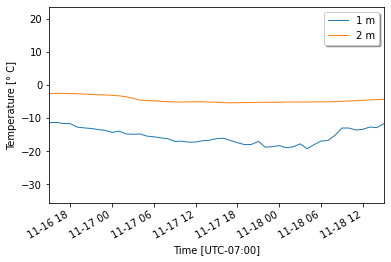

In [65]:
print(f"output time zone is {timezone_tsp.output_utc_offset}")
figure = timezone_tsp.plot_timeseries()


output time zone is UTC


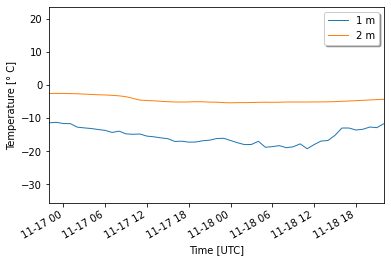

In [66]:
timezone_tsp.set_output_utc_offset("+00:00")
print(f"output time zone is {timezone_tsp.output_utc_offset}")
figure = timezone_tsp.plot_timeseries()

If you want to find out whether the `utc_offset` or `output_utc_offset` is set, you can use the `utc_offset` and `output_utc_offset()` methods.

In [72]:
print(f"Time zone of t_aware data is '{t_aware.utc_offset}'")
print(f"output time zone of t_aware is '{t_aware.output_utc_offset}'")
print("")
print(f"Time zone of timezone_tsp data is '{t_naive.utc_offset}'")
print(f"output time zone of t_naive is '{t_naive.output_utc_offset}'")

Time zone of t_aware data is 'UTC'
output time zone of t_aware is 'UTC+02:00'

Time zone of timezone_tsp data is 'None'
output time zone of t_naive is 'None'
